In [1]:
pwd 


'C:\\Users\\DEEPIKA SINGH'

In [112]:
cd F:\

F:\


In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
import seaborn as sns


In [113]:
train_dataframe = pd.read_csv('train.csv')
test_dataframe = pd.read_csv('test.csv')

In [114]:
train_dataframe.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Checking no of rows and column 

In [14]:
train_dataframe.shape

(1460, 81)

In [115]:
train_dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
train_dataframe.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [68]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

TypeError: '<=' not supported between instances of 'float' and 'str'

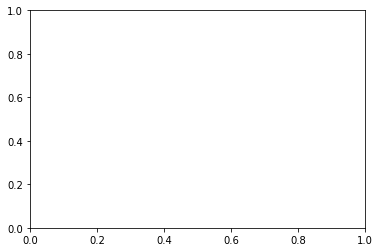

In [69]:
plt.hist(train_dataframe.PoolQC)

In [41]:

train_dataframe['Alley'].nunique()


2

In [59]:
numeric_feature = train_dataframe.select_dtypes(include=[np.number])
numeric_feature.shape
#there are 38 numeric feature in the dataframe

(1460, 38)

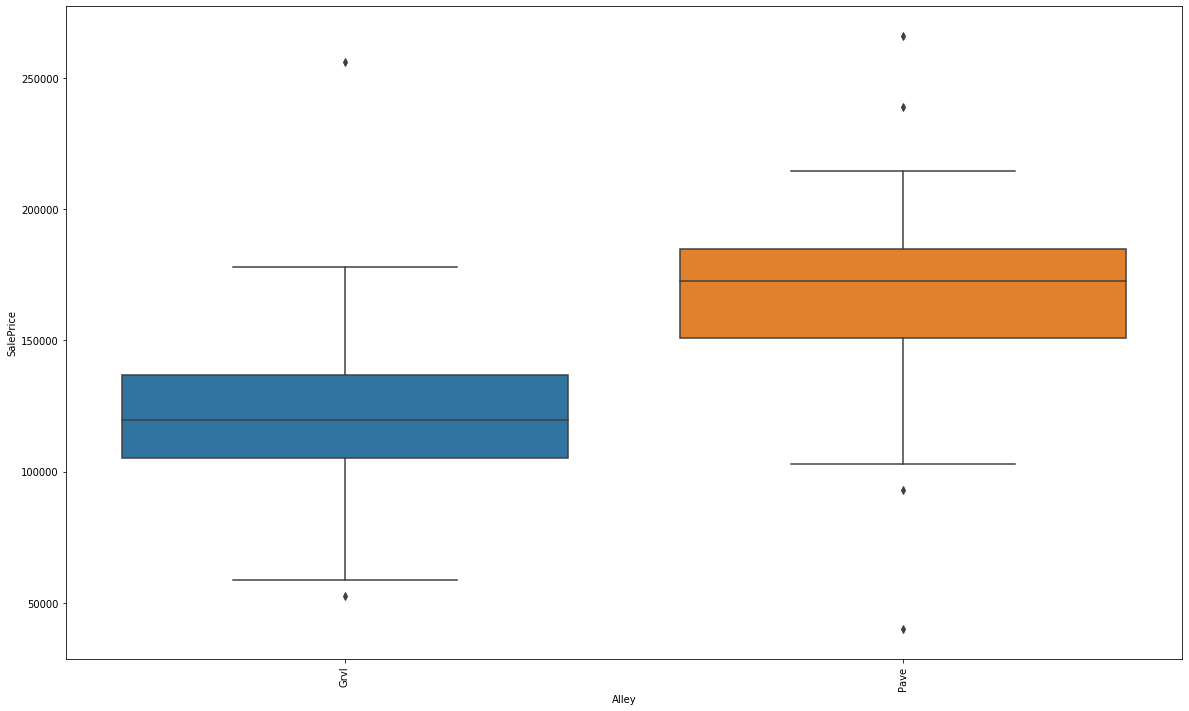

In [64]:
plt.figure(figsize=(20,12))
sns.boxplot(x = 'Alley',y = 'SalePrice',data = train_dataframe)
plt.xticks(rotation = 90)
plt.show()

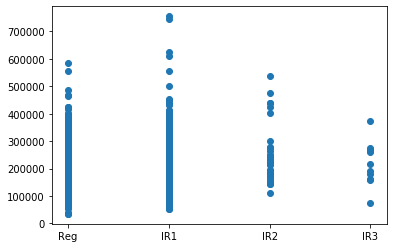

In [66]:
plt.scatter(x = 'LotShape',y = 'SalePrice',data = train_dataframe)

In [116]:
X= train_dataframe.iloc[:,:-1]
y = train_dataframe.iloc[:,-1]

In [117]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [118]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [119]:
X.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond

In [120]:
missing_data = train_dataframe.isna().sum()

In [121]:
missing_data = missing_data[missing_data > 0]

In [122]:
missing_data_sorted = missing_data.sort_values(ascending = False)

In [123]:
missing_data_sorted

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [124]:
train_dataframe.drop('Id',axis = 1,inplace = True)

In [125]:
X.drop('Id',axis = 1, inplace = True)

In [126]:
def CategoryFeaturePlot(columns):
    fig = plt.figure(figsize=(30,55))
    
    for i, column in enumerate(columns):

       
        plt.subplot(16,5, i+1)
        
        sns.scatterplot(x = column, y = train_dataframe['SalePrice'], data = train_dataframe,s = 80)
        
        plt.xticks(rotation = 90,fontsize=10)
        plt.tight_layout()

    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


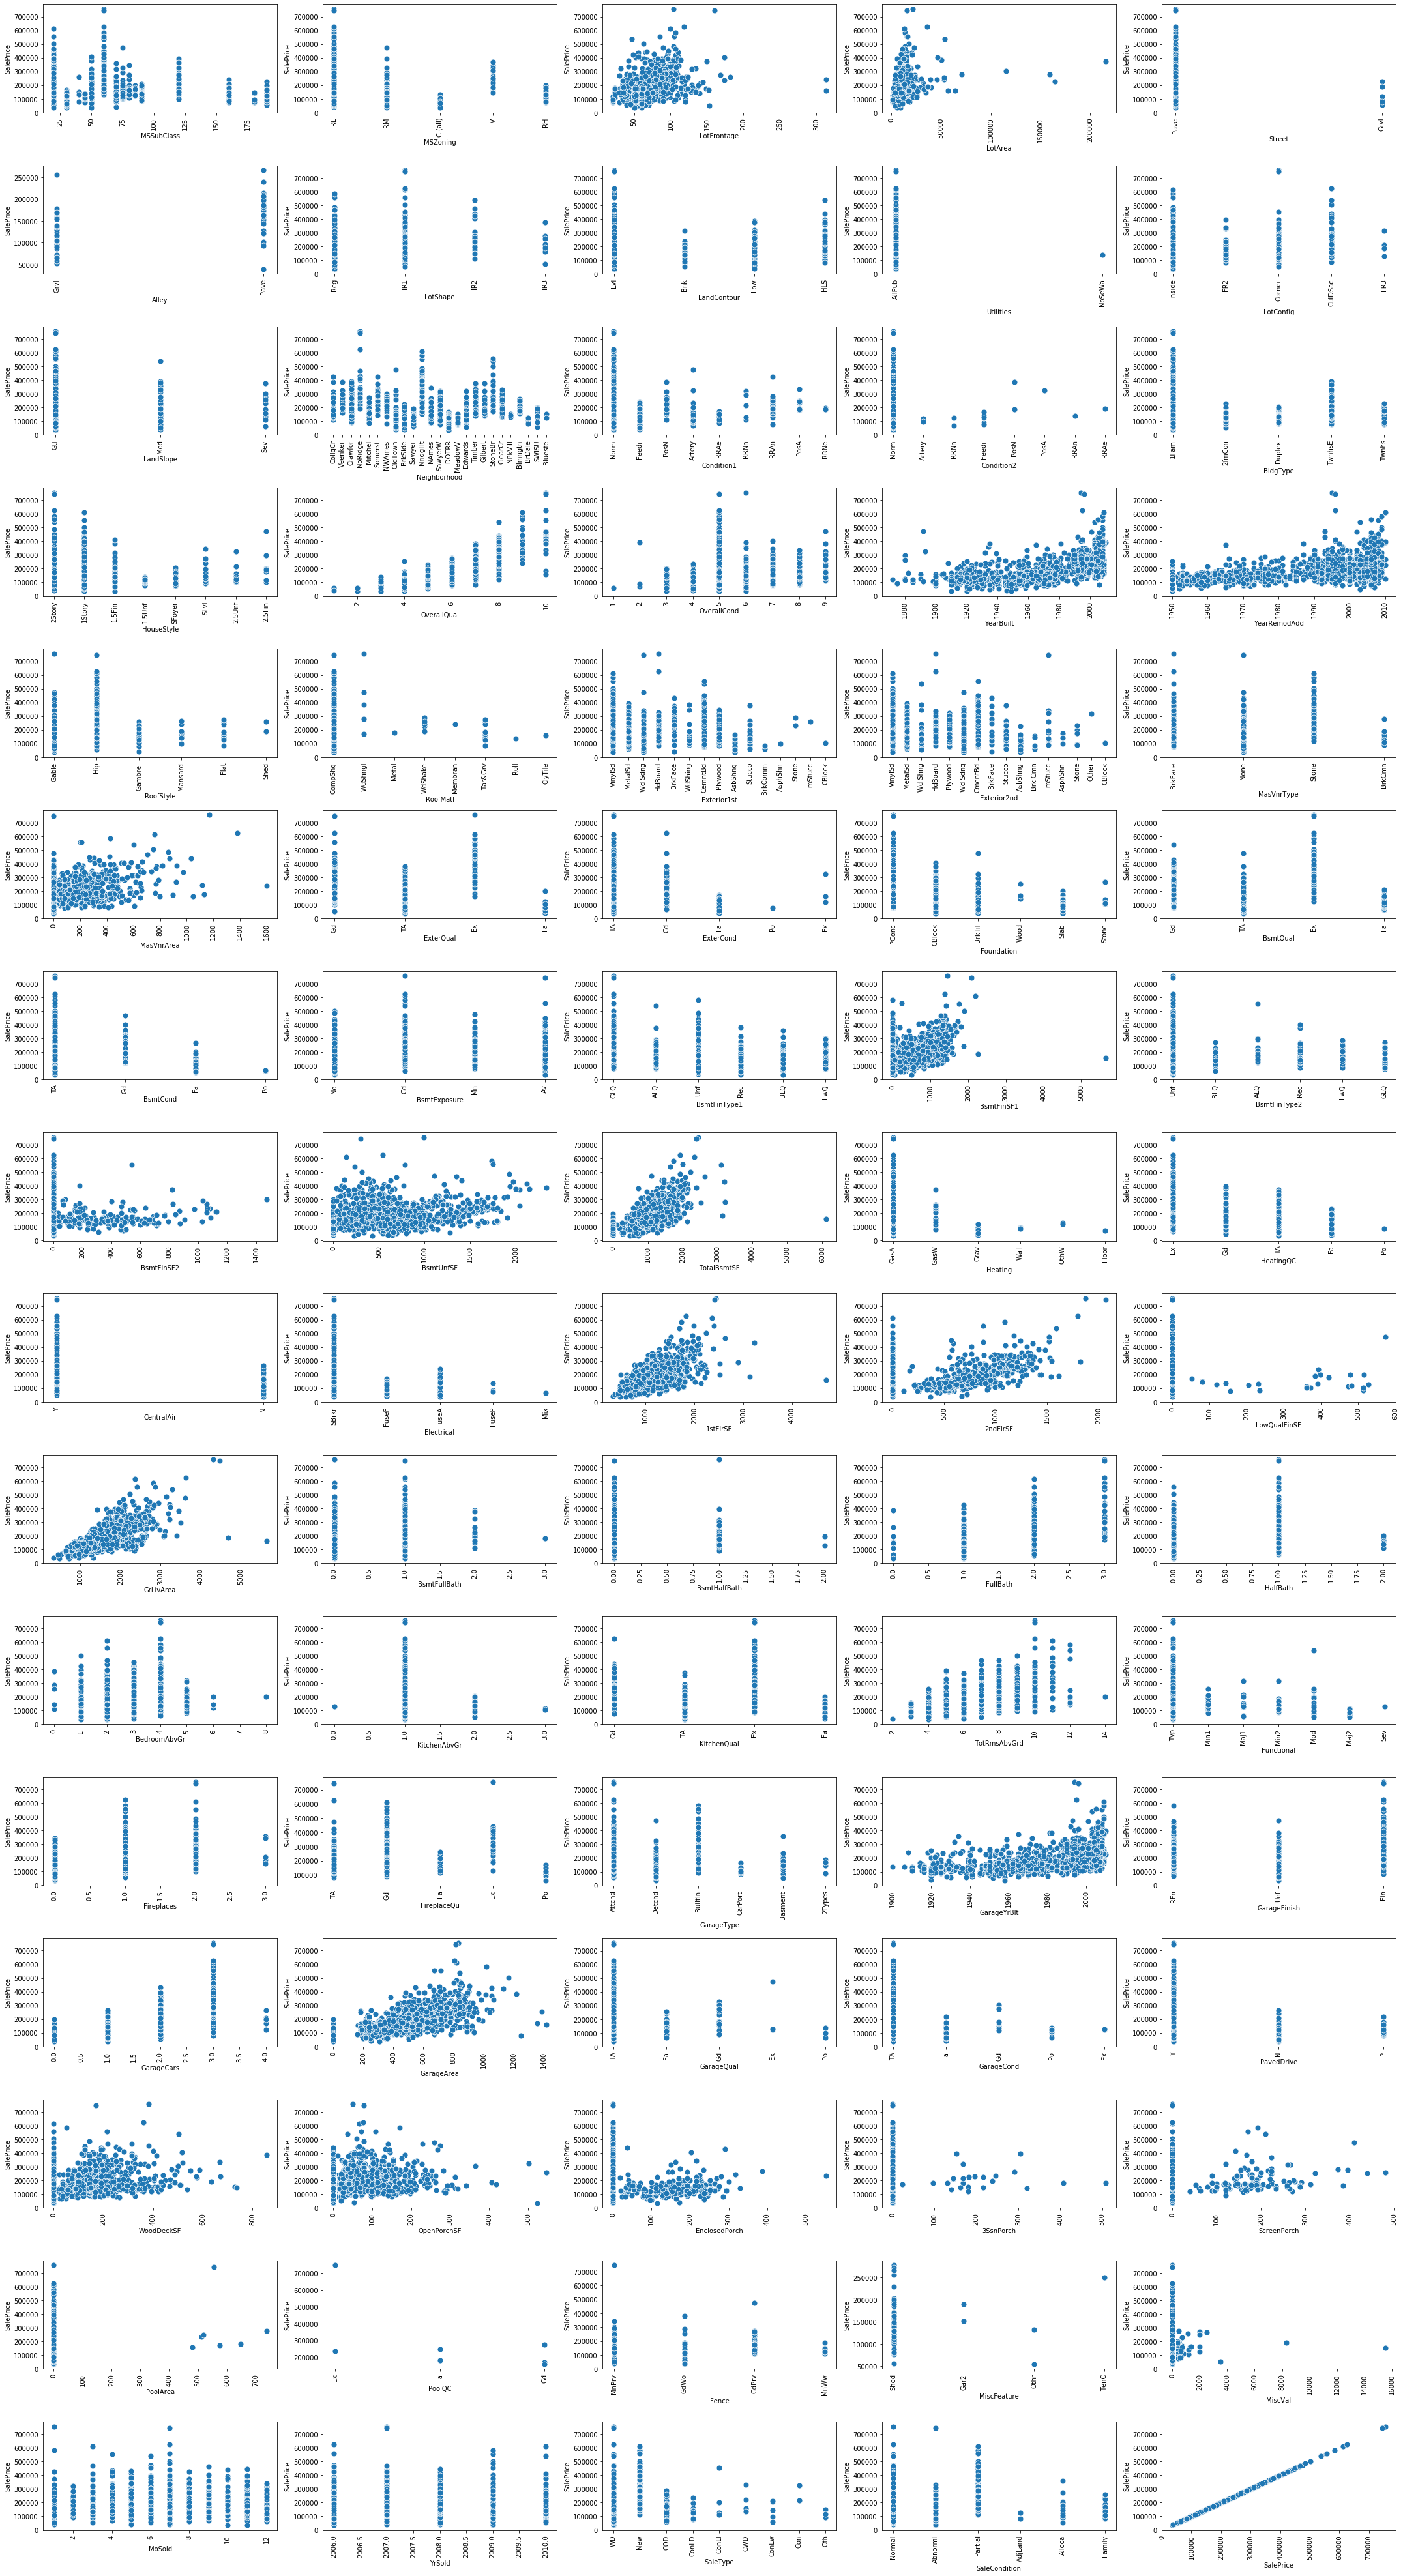

In [89]:
CategoryFeaturePlot(train_dataframe.columns)

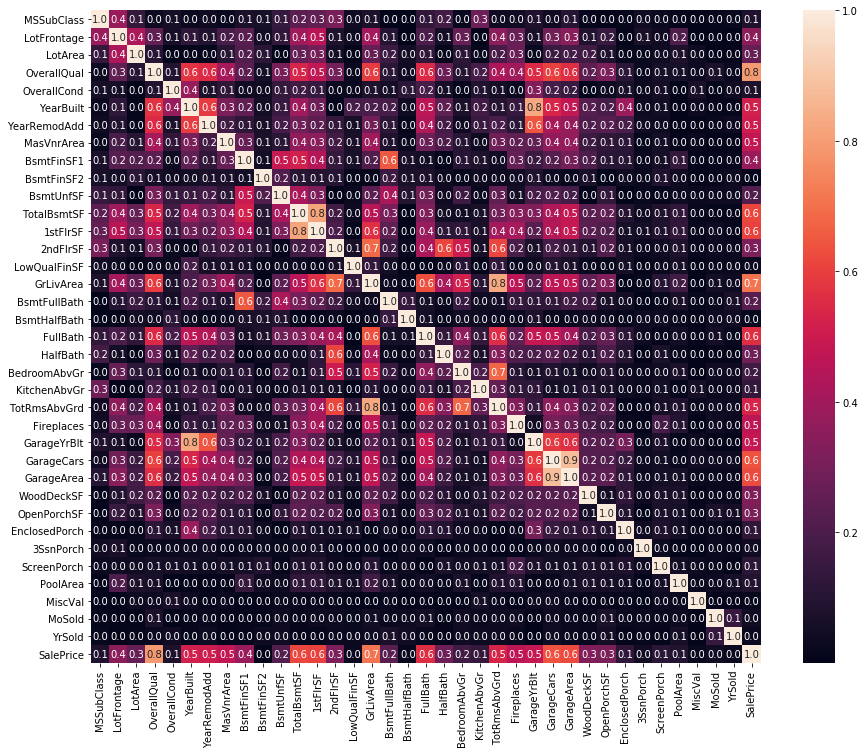

In [127]:
corrmat = train_dataframe.corr().abs()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, annot = True, fmt = '.1f');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


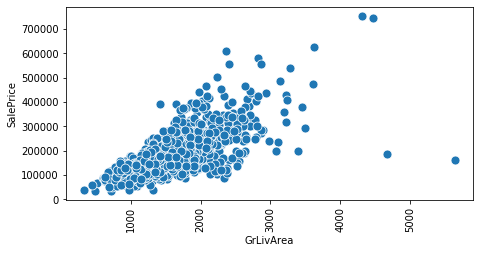

In [128]:
CategoryFeaturePlot(['GrLivArea'])

In [129]:
train_dataframe.drop(train_dataframe[(train_dataframe['GrLivArea']>4500) & (train_dataframe['SalePrice']<300000)].index, inplace=True)
train_dataframe.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


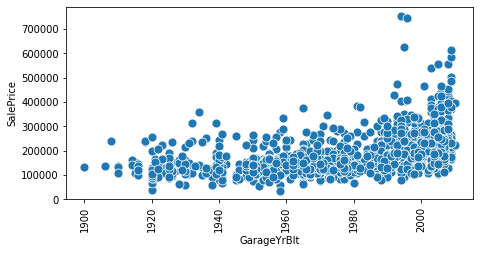

In [130]:
CategoryFeaturePlot(['GarageYrBlt'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


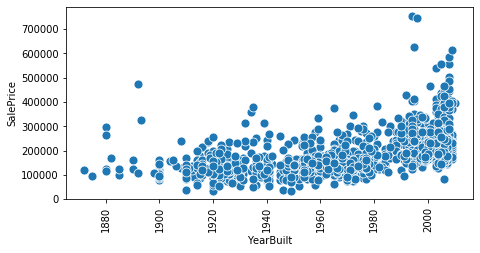

In [131]:
CategoryFeaturePlot(['YearBuilt'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


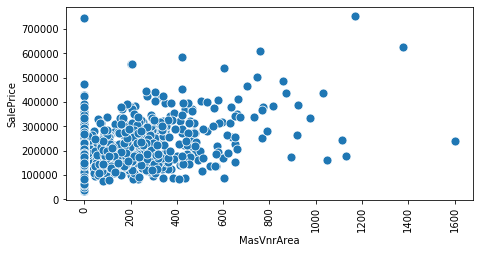

In [132]:
CategoryFeaturePlot(['MasVnrArea'])

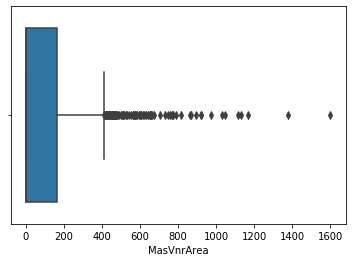

In [133]:
sns.boxplot(train_dataframe['MasVnrArea'])

In [134]:
train_dataframe.drop(train_dataframe[(train_dataframe['MasVnrArea']>1200) & (train_dataframe['SalePrice']<650000)].index, inplace=True)
train_dataframe.reset_index(drop=True, inplace=True)

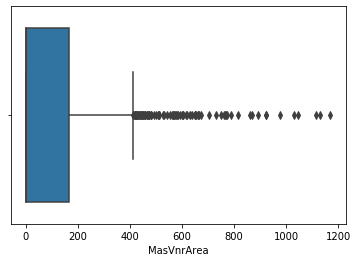

In [135]:
sns.boxplot(train_dataframe['MasVnrArea'])

In [136]:
train_labels = train_dataframe['SalePrice'].reset_index(drop=True)
train_set = train_dataframe.drop(['SalePrice'], axis=1)
test_set = test_dataframe

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_data = pd.concat([train_set, test_set]).reset_index(drop=True)
print("Shape of all data : {}".format(all_data.shape))

Shape of all data : (2915, 80)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [152]:
# PoolQC is categorical with the values (Ex,Gd,TA,Fa,NA) so  will fill the missing with 'None'
train_dataframe["PoolQC"] = train_dataframe["PoolQC"].fillna("None")
# MiscFeature is categorical with the values (Elev,Gar2,Othr,Shed,TenC,NA) so  will fill the missing with 'None'
train_dataframe["MiscFeature"] = train_dataframe["MiscFeature"].fillna("None")
# Alley is categorical with the values (Grvl,Pave,NA) so  will fill the missing with 'None'
train_dataframe["Alley"] = train_dataframe["Alley"].fillna("None")
# Fence is categorical with the values (GdPrv,MnPrv,GdWo,MnWw,NA) so  will fill the missing with 'None'
train_dataframe["Fence"] = train_dataframe["Fence"].fillna("None")
# FireplaceQu is categorical with the values (Ex,Gd,TA,Fa,Po,NA) so  will fill the missing with 'None'
train_dataframe["FireplaceQu"] = train_dataframe["FireplaceQu"].fillna("None")
# Median of Lot frontage for the whole neighbourhood
train_dataframe["LotFrontage"] = train_dataframe.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# categorical 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' fill with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_dataframe[col] = train_dataframe[col].fillna('None')
 # If no garage then no car
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train_dataframe[col] = train_dataframe[col].fillna(0)
# Fill in 0 for no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_dataframe[col] = train_dataframe[col].fillna(0)
    
 # Categorical 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' fill with None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_dataframe[col] = train_dataframe[col].fillna('None')
# Categorical MasVnrType fill with None
train_dataframe["MasVnrType"] = train_dataframe["MasVnrType"].fillna("None")
# Fill 0 if no area
train_dataframe["MasVnrArea"] = train_dataframe["MasVnrArea"].fillna(0)
# For MSZoning 'RL' is predominant so will take that for missing ones
train_dataframe['MSZoning'] = train_dataframe['MSZoning'].fillna(train_dataframe['MSZoning'].mode()[0])
# Categorical Utilities fill with NOne
train_dataframe["Utilities"] = train_dataframe["Utilities"].fillna("None")
# For Functional if no data that means typical
train_dataframe["Functional"] = train_dataframe["Functional"].fillna("Typ")

# For Electrical 'SBrkr' is predominant so will take that for missing ones
train_dataframe['Electrical'] = train_dataframe['Electrical'].fillna(train_dataframe['Electrical'].mode()[0])

# For KitchenQual 'TA' is predominant so will take that for missing ones
train_dataframe['KitchenQual'] = train_dataframe['KitchenQual'].fillna(train_dataframe['KitchenQual'].mode()[0])

# For Exterior1st and Exterior2nd since very few missing will take most predominant one
train_dataframe['Exterior1st'] = train_dataframe['Exterior1st'].fillna(train_dataframe['Exterior1st'].mode()[0])
train_dataframe['Exterior2nd'] = train_dataframe['Exterior2nd'].fillna(train_dataframe['Exterior2nd'].mode()[0])

# For SaleType 'WD' is predominant so will take that for missing ones
train_dataframe['SaleType'] = train_dataframe['SaleType'].fillna(train_dataframe['SaleType'].mode()[0])

# For categorical MSSubClass fill with None
train_dataframe['MSSubClass'] = train_dataframe['MSSubClass'].fillna("None")


In [138]:
missing_data = all_data.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_data_sorted = missing_data.sort_values(ascending = False)

print("Missing data :".format(missing_data_sorted))

Missing data :


In [139]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [153]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 80 columns):
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1456 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            1456 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-null object
Exterior2nd      1456 no

In [154]:
train_dataset  = pd.get_dummies(train_dataframe)

In [157]:
train_dataset.shape

(1456, 302)

In [158]:
all_data = pd.get_dummies(all_data)
print("Shape of all data : {}".format(all_data.shape))


Shape of all data : (2915, 341)


In [159]:
all_data = all_data.loc[:,~all_data.columns.duplicated()]

In [161]:
all_data.shape


(2915, 341)

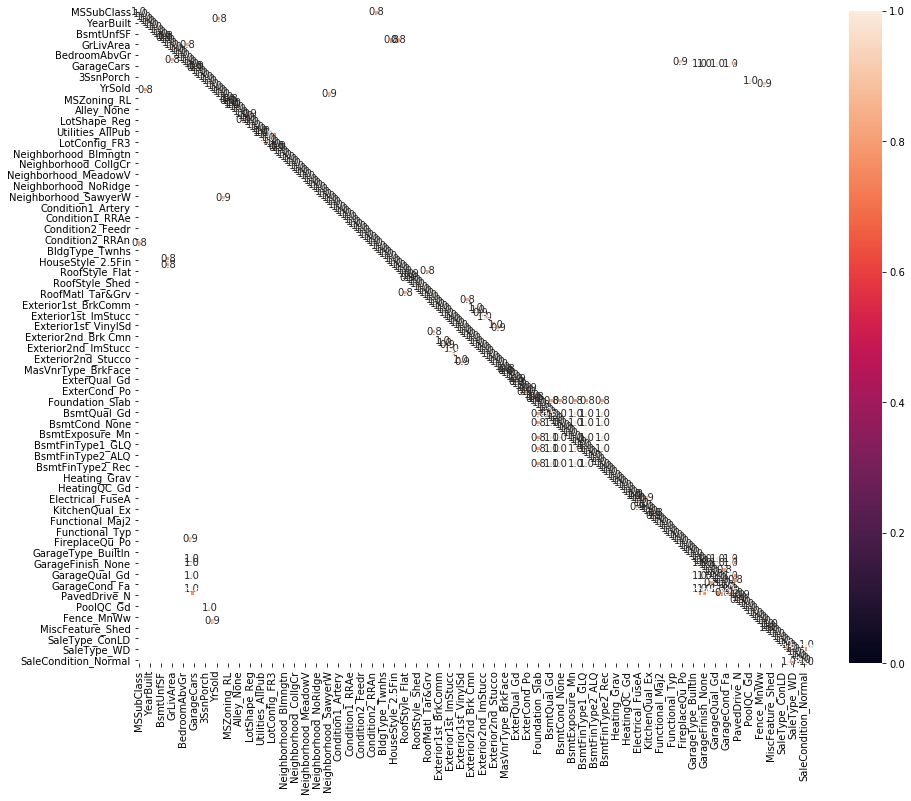

In [163]:
TO
sns.heatmap(corrmat, mask= corrmat < 0.75, annot = True, fmt = '.1f');

In [257]:
final_train_sample = train_dataframe.loc[:,['OverallQual','GarageYrBlt','MasVnrArea','TotalBsmtSF','GrLivArea','FullBath','GarageArea']]
final_target_sample = train_dataframe['SalePrice']

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [259]:
x_train,x_test,y_train,y_test = train_test_split(final_train_sample,final_target_sample,test_size = 0.2)

In [260]:
glm = LinearRegression()

result = glm.fit(x_train,y_train)
print(f'coff are {glm.coef_} \nintercept value is {glm.intercept_}')

coff are [ 2.20445032e+04 -8.14595823e+00  2.59617277e+01  4.05741162e+01
  4.79427692e+01 -1.19814517e+03  6.80017831e+01] 
intercept value is -86392.96463193523


In [261]:
predicted_result = glm.predict(x_test)
predicted_result_dataframe = pd.DataFrame(predicted_result,columns = ['Predicted_values'])



In [262]:
from sklearn.metrics import mean_squared_error

In [263]:
rmse= np.sqrt(mean_squared_error(y_test,predicted_result))

In [264]:
print(rmse)

37025.19580768296


In [265]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [266]:
y_pred=regressor.predict(x_test)

In [267]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8306112900550429

In [268]:
regressor.score(x_test,y_test)

0.8306112900550429

In [184]:
x_train

,OverallQual,GarageYrBlt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageArea
142,5,2000.0,0.0,910,910,1385,2,720
1117,5,1959.0,0.0,1040,1040,1040,1,286
640,8,1972.0,0.0,1952,2000,2704,2,538
1073,7,1940.0,0.0,800,960,1740,1,240
556,7,1996.0,0.0,729,729,1446,2,406
794,6,1977.0,148.0,660,1285,1285,1,528
699,7,1969.0,168.0,1164,1164,1164,1,528
1418,6,2003.0,170.0,848,848,848,1,420
1165,6,2000.0,0.0,959,959,1671,2,472
248,7,2003.0,101.0,840,840,1668,2,500


In [176]:
final_train_sample = train_dataframe.loc[:,['OverallQual','GarageYrBlt','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','GarageArea']]
final_target_sample = train_dataframe['SalePrice']

KeyError: 'SalePrice'

In [181]:
y_pred

array([111730.        , 196050.        , 183180.        , 354060.        ,
        95930.        , 139640.        , 105017.9       ,  87316.66666667,
       190746.        , 146960.        , 256757.9       , 319791.8       ,
        91900.        , 128940.        , 125700.        , 159850.        ,
       182391.        , 111030.        , 207525.        , 162464.        ,
       238990.        , 135490.        , 125775.        , 116000.        ,
       232125.        , 162270.        , 126208.3       , 156200.9       ,
       100836.6       , 171300.        , 125090.        , 283238.1       ,
        64166.66666667, 137085.        , 269687.        ,  79929.3       ,
       197533.15      , 175850.        , 161365.        ,  78429.3       ,
       156394.        , 300175.        , 140040.        , 187280.        ,
       118100.        , 178680.        , 104900.        , 184390.        ,
       124970.        , 168390.        , 197890.        , 206929.        ,
       210787.        , 2

In [182]:
test_dataframe.drop('Id',axis = 1 , inplace = True)

KeyError: "['Id'] not found in axis"

In [233]:
final_train_sample = train_dataframe.loc[:,['OverallQual','GarageYrBlt','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','GarageArea']]
final_target_sample = train_dataframe['SalePrice']

In [192]:
y_pred=regressor.predict(final_test)

In [189]:
final_test

,OverallQual,GarageYrBlt,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageArea
0,5,1961.0,0.0,882.0,896,896,1,730.0
1,6,1958.0,108.0,1329.0,1329,1329,1,312.0
2,5,1997.0,0.0,928.0,928,1629,2,482.0
3,6,1998.0,20.0,926.0,926,1604,2,470.0
4,8,1992.0,0.0,1280.0,1280,1280,2,506.0
5,6,1993.0,0.0,763.0,763,1655,2,440.0
6,6,1992.0,0.0,1168.0,1187,1187,2,420.0
7,6,1998.0,0.0,789.0,789,1465,2,393.0
8,7,1990.0,0.0,1300.0,1341,1341,1,506.0
9,4,1970.0,0.0,882.0,882,882,1,525.0


In [190]:
# PoolQC is categorical with the values (Ex,Gd,TA,Fa,NA) so  will fill the missing with 'None'
test_dataframe["PoolQC"] = test_dataframe["PoolQC"].fillna("None")
# MiscFeature is categorical with the values (Elev,Gar2,Othr,Shed,TenC,NA) so  will fill the missing with 'None'
test_dataframe["MiscFeature"] = test_dataframe["MiscFeature"].fillna("None")
# Alley is categorical with the values (Grvl,Pave,NA) so  will fill the missing with 'None'
test_dataframe["Alley"] = test_dataframe["Alley"].fillna("None")
# Fence is categorical with the values (GdPrv,MnPrv,GdWo,MnWw,NA) so  will fill the missing with 'None'
test_dataframe["Fence"] = test_dataframe["Fence"].fillna("None")
# FireplaceQu is categorical with the values (Ex,Gd,TA,Fa,Po,NA) so  will fill the missing with 'None'
test_dataframe["FireplaceQu"] = test_dataframe["FireplaceQu"].fillna("None")
# Median of Lot frontage for the whole neighbourhood
test_dataframe["LotFrontage"] = test_dataframe.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# categorical 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' fill with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_dataframe[col] = test_dataframe[col].fillna('None')
 # If no garage then no car
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test_dataframe[col] = test_dataframe[col].fillna(0)
# Fill in 0 for no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test_dataframe[col] = test_dataframe[col].fillna(0)
    
 # Categorical 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' fill with None
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test_dataframe[col] = test_dataframe[col].fillna('None')
# Categorical MasVnrType fill with None
test_dataframe["MasVnrType"] = test_dataframe["MasVnrType"].fillna("None")
# Fill 0 if no area
test_dataframe["MasVnrArea"] = test_dataframe["MasVnrArea"].fillna(0)
# For MSZoning 'RL' is predominant so will take that for missing ones
test_dataframe['MSZoning'] = test_dataframe['MSZoning'].fillna(test_dataframe['MSZoning'].mode()[0])
# Categorical Utilities fill with NOne
test_dataframe["Utilities"] = test_dataframe["Utilities"].fillna("None")
# For Functional if no data that means typical
test_dataframe["Functional"] = test_dataframe["Functional"].fillna("Typ")

# For Electrical 'SBrkr' is predominant so will take that for missing ones
test_dataframe['Electrical'] = test_dataframe['Electrical'].fillna(test_dataframe['Electrical'].mode()[0])

# For KitchenQual 'TA' is predominant so will take that for missing ones
test_dataframe['KitchenQual'] = test_dataframe['KitchenQual'].fillna(test_dataframe['KitchenQual'].mode()[0])

# For Exterior1st and Exterior2nd since very few missing will take most predominant one
test_dataframe['Exterior1st'] = test_dataframe['Exterior1st'].fillna(test_dataframe['Exterior1st'].mode()[0])
test_dataframe['Exterior2nd'] = test_dataframe['Exterior2nd'].fillna(test_dataframe['Exterior2nd'].mode()[0])

# For SaleType 'WD' is predominant so will take that for missing ones
test_dataframe['SaleType'] = test_dataframe['SaleType'].fillna(test_dataframe['SaleType'].mode()[0])

# For categorical MSSubClass fill with None
test_dataframe['MSSubClass'] = test_dataframe['MSSubClass'].fillna("None")


In [196]:
y_pred


array([134570., 150750., 160908., ..., 147050.,  96330., 233579.])

In [197]:
test_dataframe['SalePrice'] = y_pred

In [207]:
test_dataframe

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,6,2010,WD,Normal,134570.000000
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,Gar2,12500,6,2010,WD,Normal,150750.000000
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,3,2010,WD,Normal,160908.000000
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,6,2010,WD,Normal,184340.000000
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,0,None,None,None,0,1,2010,WD,Normal,212271.200000
5,60,RL,75.0,10000,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,4,2010,WD,Normal,180530.000000
6,20,RL,63.0,7980,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,500,3,2010,WD,Normal,162610.000000
7,60,RL,63.0,8402,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,5,2010,WD,Normal,181789.000000
8,20,RL,85.0,10176,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2010,WD,Normal,170049.000000
9,20,RL,70.0,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,113701.600000


In [231]:

sub = test_dataframe['SalePrice']

In [232]:
sub.to_csv('Submission_file.csv',index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
